### Comparative plot for Vision Zero Code ###
by Richard Sowers

* <r-sowers@illinois.edu>

<https://publish.illinois.edu/r-sowers/>

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

imports

In [1]:
%matplotlib inline
from matplotlib import pylab as plotter
import pandas
import numpy
import importlib
import MAIN_makeplots as makeplots
import pickle
import MAIN_config_hour_of_day as config
#import MAIN_config_season as config

External files

In [2]:
dir_names=config.dirnames
curvefigfile="curve_compare.png"
scatterfigfile="scatter_compare.png"

In [3]:
TradeoffDict={}
for d,dirname in enumerate(dir_names):
    dataName=dirname+"/data.p"
    windowname=config.windower(d).name
    dataName=dirname+"/data.p"
    data=pickle.load(open(dataName,"rb"))
    TradeoffDict[windowname]=makeplots.tradeoff(data)

Manhattan whole day


/anaconda3/envs/VZ/lib/python3.6/site-packages/pandas/core/indexes/base.py:162: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


Manhattan evening and morning
Manhattan morning rush hour
Manhattan midday
Manhattan evening rush hour


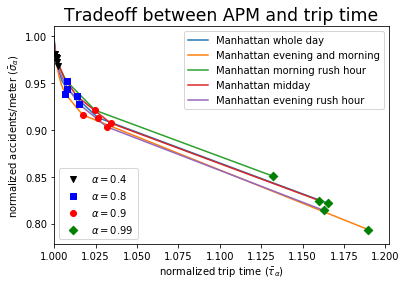

In [4]:
def get_offset(ind):
    if ind==0:
        return (70,-5)
    if ind==1:
        return (70,-11)
    if ind==2:
        return (70,-19)
    if ind==3:
        return (70,-10)
    if ind==4:
        return (70,-15)
    if ind==5:
        return (70,-20)
    if ind==6:
        return (100,-20)
    if ind==7:
        return (-10,-40)
    if ind==8:
        return (40,40)
    if ind==9:
        return (0,40)
    if ind==10:
        return (0,40)

plotter.figure()
labels = ['alpha 0.{0}'.format(i) for i in range(0,10)]
lines=[]
for ind,(windowname,tradeoff) in enumerate(TradeoffDict.items()):
    points=tradeoff.curve()
    l, = plotter.plot(points["rel_time"],points["rel_APM"],label=windowname,zorder=1)
    s1=plotter.scatter(points["rel_time"].iloc[5],points["rel_APM"].iloc[5],label=None,marker = 'v',zorder=4,color='black')
    s2=plotter.scatter(points["rel_time"].iloc[8],points["rel_APM"].iloc[8],label=None,marker = 's',zorder=3,color='blue')
    s3=plotter.scatter(points["rel_time"].iloc[9],points["rel_APM"].iloc[9],label=None,marker = 'o',zorder=5,color='red')
    s4=plotter.scatter(points["rel_time"].iloc[10],points["rel_APM"].iloc[10],label=None,marker = 'D',zorder=2,color='green')
    lines.append(l)
#for ind,(alpha,row) in enumerate(points.iterrows()):
#        x,y = row
#        plotter.annotate(
#            '$\\alpha=${:.1f}'.format(alpha),
#            xy=(x, y), xytext=get_offset(ind),
#            textcoords='offset points', ha='right', va='bottom',
#            bbox=None,#dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
#            ,fontsize='large')
plotter.xlim(1,)
plotter.title("Tradeoff between APM and trip time",fontsize='xx-large')
plotter.xlabel("normalized trip time ($\\bar\\tau_{\\alpha}$)",fontsize='medium')
plotter.ylabel("normalized accidents/meter ($\\bar\sigma_{\\alpha}$)",fontsize='medium')
legend2=plotter.legend((s1,s2,s3,s4),('$\\alpha=0.4$','$\\alpha=0.8$','$\\alpha=0.9$','$\\alpha=0.99$'),loc=3)
plotter.legend()
plotter.gca().add_artist(legend2)
#plotter.savefig(curvefigfile,bbox_inches='tight')
plotter.show()
plotter.close()

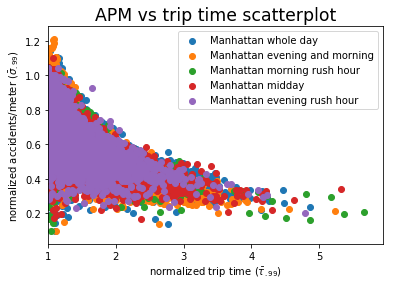

In [5]:
plotter.figure()
for windowname,tradeoff in TradeoffDict.items():
    scatterPoints=tradeoff.avoidancePoints()
    xvals=scatterPoints["trip_time"]
    yvals=scatterPoints["trip_APM"]
    plotter.scatter(xvals,yvals,label=windowname)
plotter.xlim(1,)
plotter.title("APM vs trip time scatterplot",fontsize='xx-large')
plotter.xlabel("normalized trip time ($\\bar\\tau_{.99}$)",fontsize='medium')
plotter.ylabel("normalized accidents/meter ($\\bar\sigma_{.99}$)",fontsize='medium')
plotter.legend()
plotter.savefig(scatterfigfile,bbox_inches='tight')
plotter.show()
plotter.close()

In [39]:
scatterPoints.head()
anomPoints = scatterPoints[scatterPoints['trip_APM'] > 1]

In [35]:
import folium
import folium.plugins
import osmnx
import networkx

In [36]:
Manhattan_center=(40.766045,-73.977784)
#tiles="OpenStreetMap"
#tiles="CartoDBpositron"
#tiles="CartoDBdark_matter"
#tiles="StamenWatercolor"
#tiles="StamenToner"
tiles="StamenTerrain"

In [37]:
### for folium ###
def getPoint(node):
    try:
        temp=G.node[node]
        (lat,lng)=(temp["y"],temp["x"])
        return (lat,lng)
    except Exception:
        return None

In [30]:
osmnx.config(log_file=True, log_console=True, use_cache=True)
G_raw = osmnx.graph_from_place('Manhattan Island, New York, USA', network_type='drive')

In [31]:
G=G_raw.copy()

[(40.746659, -73.990067), (40.746659, -73.990067), (40.747277, -73.989617), (40.7497921, -73.9877652), (40.762396, -73.978601), (40.755405, -73.979483), (40.753481, -73.980888), (40.7510002, -73.990617), (40.764279, -73.973015), (40.7547823, -73.9799375), (40.754349, -73.976974), (40.752682, -73.9730143), (40.7577471, -73.9714524), (40.7507644, -73.9744077)]


In [50]:
fname="origins_mid"
my_map = folium.Map(Manhattan_center,
                  zoom_start=12,
                  tiles=tiles)
for o,d in anomPoints.index:
    olat,olon = getPoint(o)
    dlat,dlon = getPoint(d)
    folium.CircleMarker((olat,olon),radius=10,color='blue').add_to(my_map)
    folium.CircleMarker((dlat,dlon),radius=10,color='red').add_to(my_map)
my_map